<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap06a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6章 解答例

In [1]:
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## 例題6.1

線形分離可能なデータに対するSVMの学習をscikit-learnの[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)でコーディングせよ．

データの準備と表示

教科書のクラス1,2をこのNotebookではそれぞれクラス0,1と読み替えます。それぞれに対応するSVM用の正解ラベルは1,-1です。

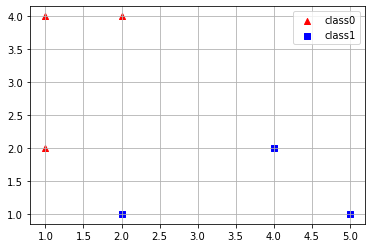

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

X = np.array([[1.0, 2.0], [1.0, 4.0], [2.0, 4.0], [2.0, 1.0], [5.0, 1.0], [4.0, 2.0]])
y = np.array([1, 1, 1, -1, -1, -1])
plt.grid()
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='^', label='class0')
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], c='blue', marker='s', label='class1')
plt.legend(loc='upper right')

課題：線形SVCでマージン最大の識別面を求めよ。

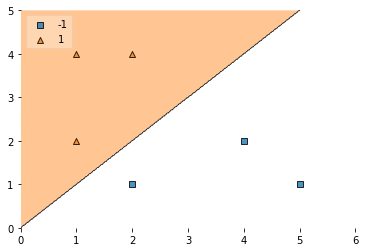

In [3]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

clf = SVC(kernel='linear')
clf.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

課題：学習された識別面の係数を表示し、マージン最大である$x_1 = x_2$という識別面になっていることを確認せよ。

In [4]:
print(clf.coef_)
print(clf.intercept_)

[[-1.  1.]]
[-0.]


## 例題6.2

線形分離不可能なデータに対するSVMの学習をscikit-learnのSVCでコーディングせよ．

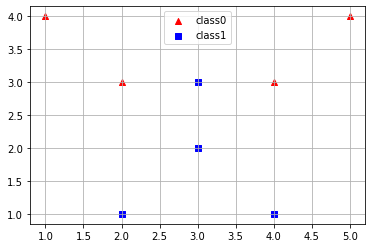

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.0, 4.0], [2.0, 3.0], [4.0, 3.0], [5.0, 4.0], [2.0, 1.0], [3.0, 2.0], [3.0, 3.0], [4.0, 1.0]])
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])
plt.grid()
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='red', marker='^', label='class0')
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], c='blue', marker='s', label='class1')
plt.legend(loc='upper center')

課題：多項式カーネルを用いて識別面を求めよ。カーネルの次数は適切なものを選択すること。

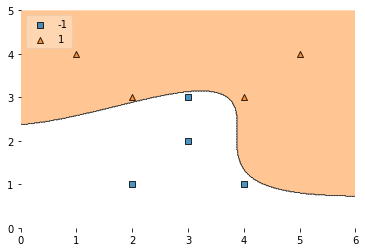

In [6]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

clf = SVC(kernel='poly', degree=4)
clf.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

課題：RBFカーネルを用いて識別面を求めよ。gammaの値は[マニュアル](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)を読んだ上で適切なものを選択すること。

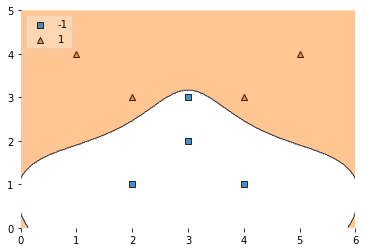

In [7]:
clf = SVC(kernel='rbf', gamma=0.5)
clf.fit(X,y)
plot_decision_regions(X=X, y=y, clf=clf, legend=2)